In [2]:
import pandas as pd            # Veri okuma ve manipülasyon
import numpy as np             # Sayısal işlemler
import matplotlib.pyplot as plt # Temel grafikler
import seaborn as sns           # İleri düzey grafikler

In [5]:
data = pd.read_csv("train.csv")
df = data.copy()

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.shape

(1460, 81)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
#Kolerasyon matrisi

#sadece sayısal sütunları alma
numeric_cols = df.select_dtypes(include=['int64','float64'])
#matris hesaplama
corr_matrix = numeric_cols.corr()

In [12]:
# SalePrice ile korelasyonu al ve mutlak değere göre sırala (en yüksekten başla)
saleprice_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
# Korelasyonu yüksek olanları göster (örneğin > 0.5 olanlar)
high_corr = saleprice_corr[saleprice_corr > 0.5]

print(high_corr)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


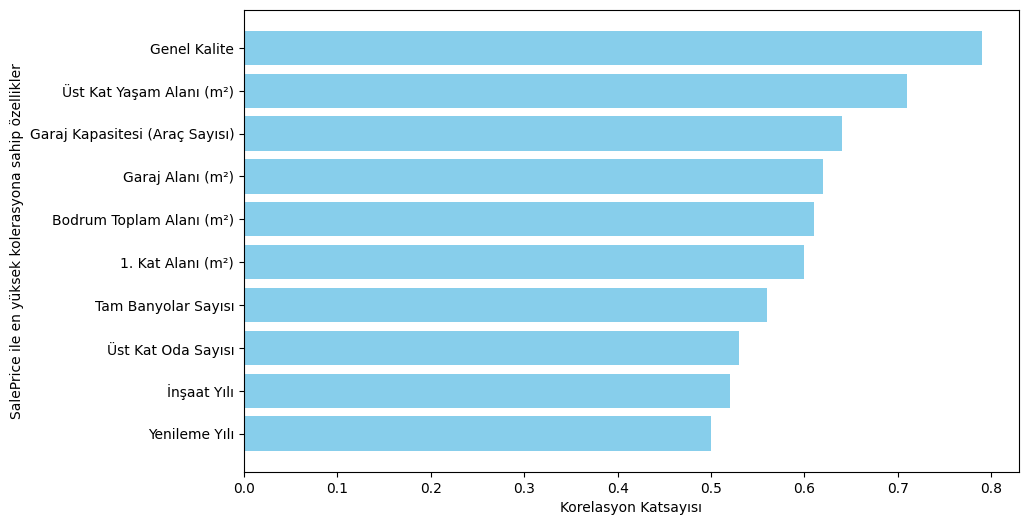

In [15]:
#features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
#            '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

features = ['Genel Kalite', 'Üst Kat Yaşam Alanı (m²)', 'Garaj Kapasitesi (Araç Sayısı)', 'Garaj Alanı (m²)', 
            'Bodrum Toplam Alanı (m²)', '1. Kat Alanı (m²)', 'Tam Banyolar Sayısı', 
            'Üst Kat Oda Sayısı', 'İnşaat Yılı', 'Yenileme Yılı']

correlations = [0.79,0.71,0.64,0.62,0.61,0.60,0.56,0.53,0.52,0.50]

plt.figure(figsize=(10,6))
plt.barh(features, correlations, color='skyblue')
plt.xlabel('Korelasyon Katsayısı')
plt.ylabel('SalePrice ile en yüksek kolerasyona sahip özellikler')
plt.gca().invert_yaxis()
plt.show()

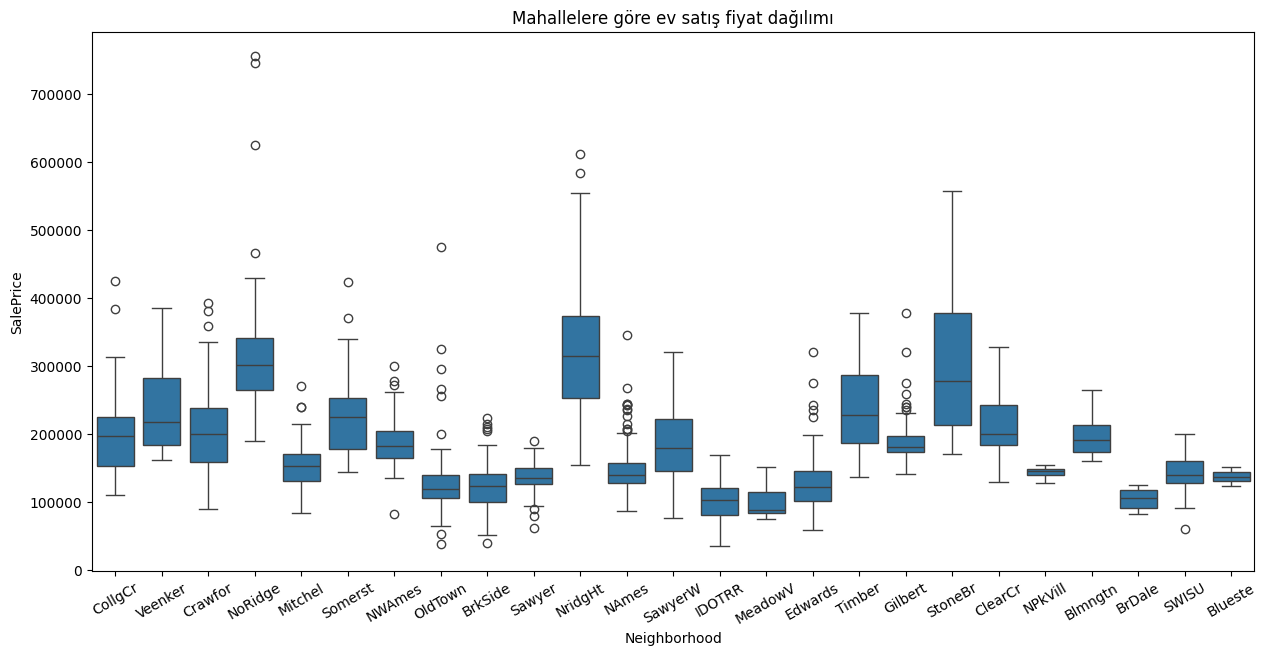

In [19]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=30)
plt.title('Mahallelere göre ev satış fiyat dağılımı')
plt.show()

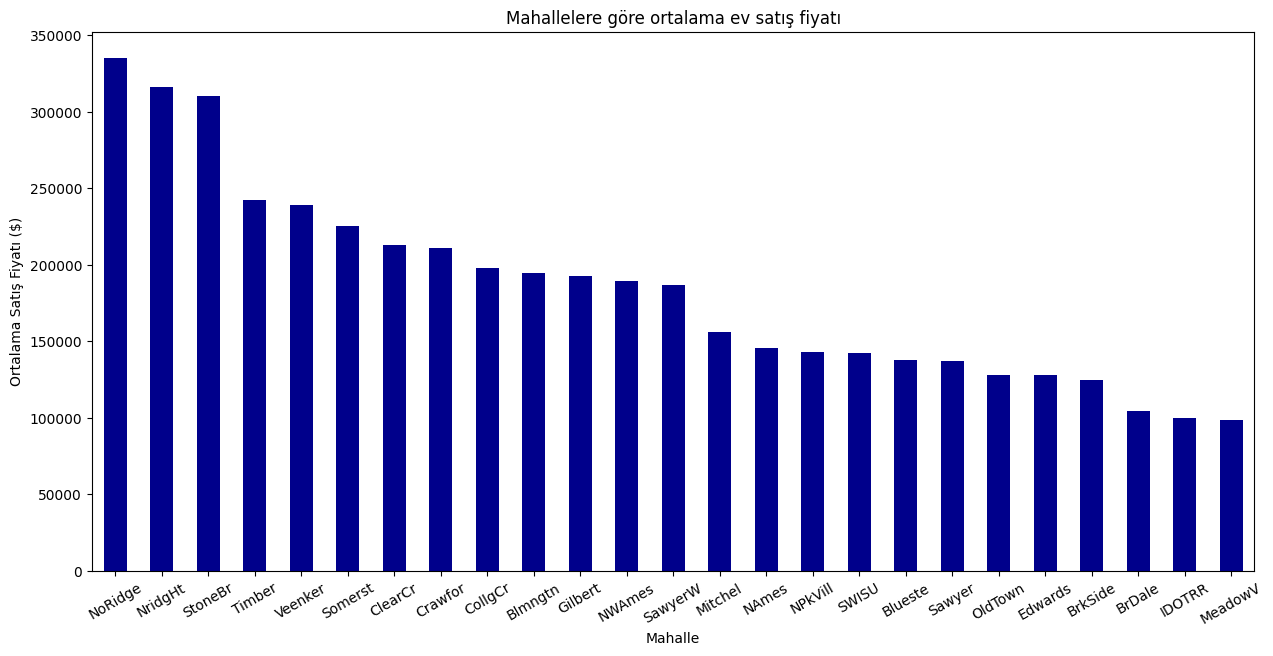

In [23]:
neighborhood_price = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

plt.figure(figsize=(15,7))
neighborhood_price.plot(kind='bar', color='darkblue')

plt.title('Mahallelere göre ortalama ev satış fiyatı')
plt.ylabel('Ortalama Satış Fiyatı ($)')
plt.xlabel('Mahalle')
plt.xticks(rotation=30)
plt.show()

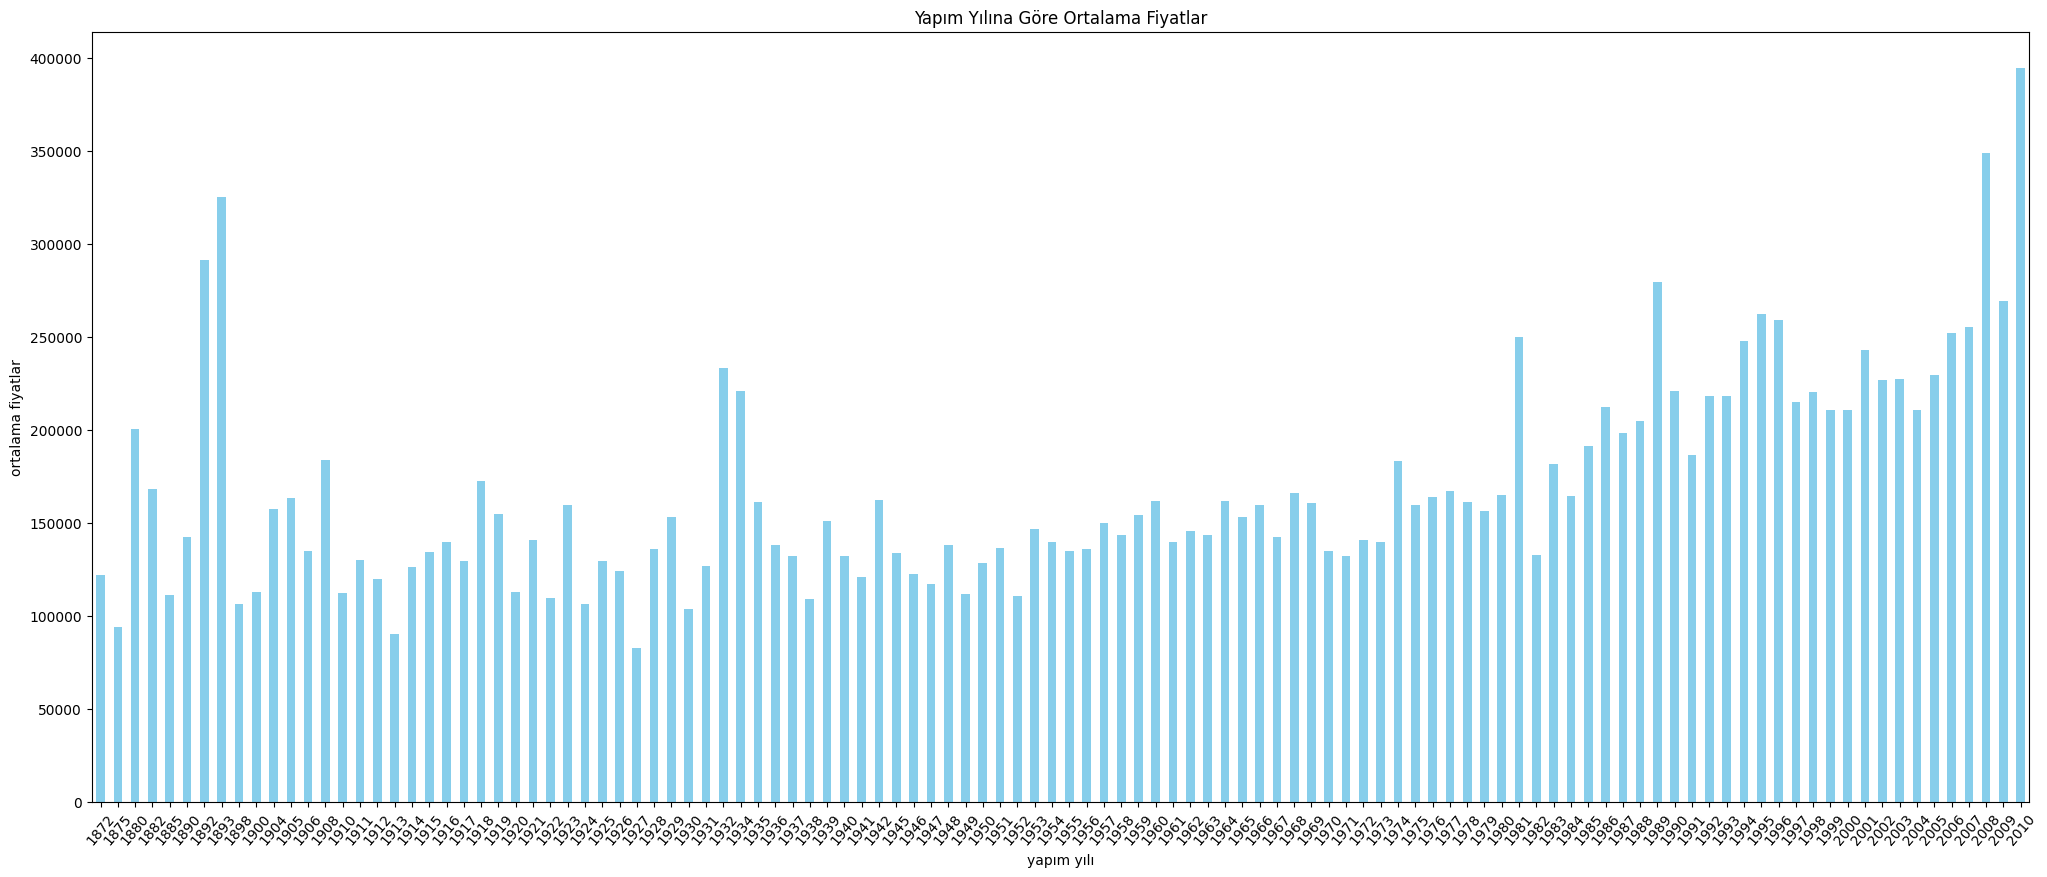

In [34]:
yearlyPrice = df.groupby('YearBuilt')['SalePrice'].mean().sort_index()

plt.figure(figsize=(25,10))
yearlyPrice.plot(kind='bar', color='skyblue')
plt.title('Yapım Yılına Göre Ortalama Fiyatlar')
plt.xlabel('yapım yılı')
plt.ylabel('ortalama fiyatlar')
plt.xticks(rotation=50)
plt.show()

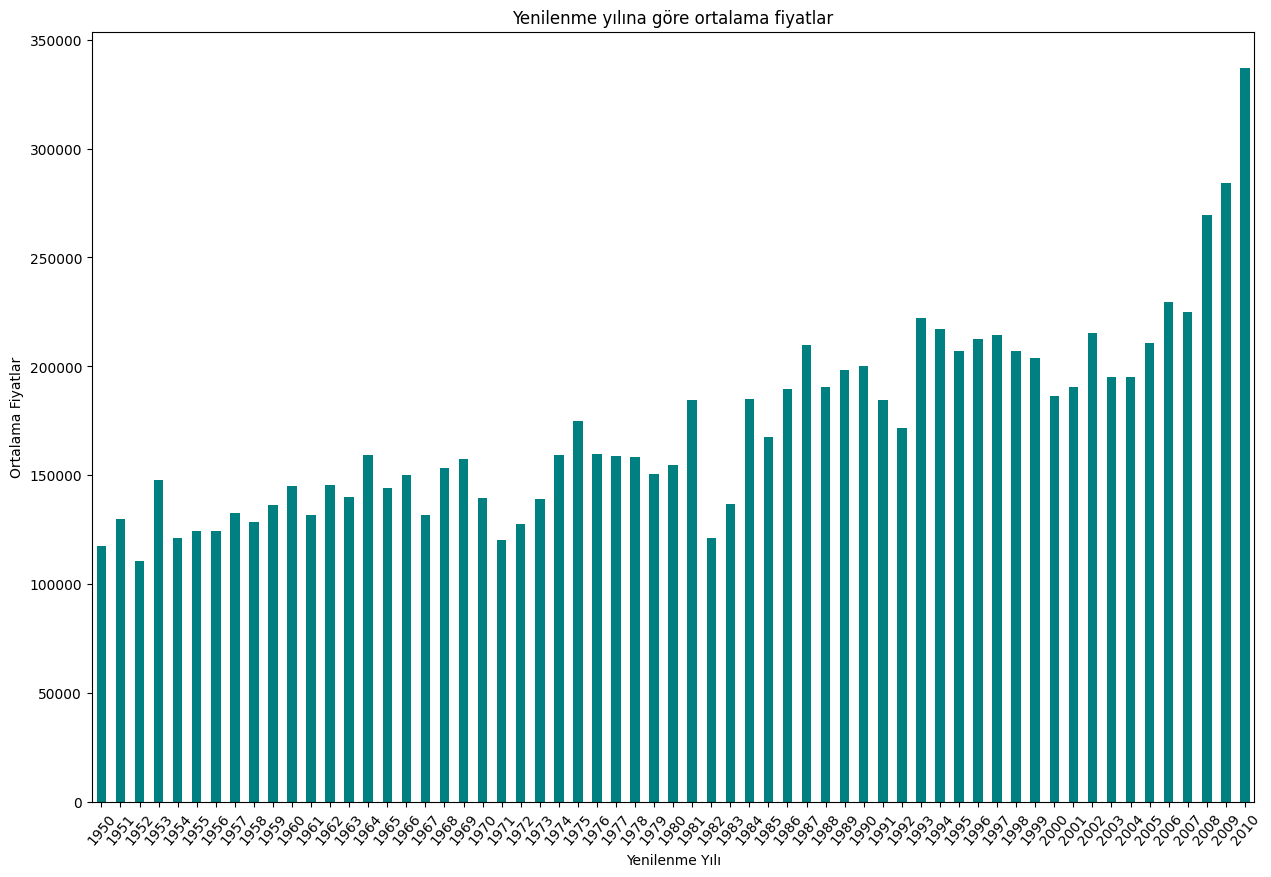

In [39]:
remod_price = df.groupby('YearRemodAdd')['SalePrice'].mean().sort_index()

plt.figure(figsize=(15,10))
remod_price.plot(kind='bar', color='teal')
plt.title('Yenilenme yılına göre ortalama fiyatlar')
plt.xlabel('Yenilenme Yılı')
plt.ylabel('Ortalama Fiyatlar')
plt.xticks(rotation=50)
plt.show()

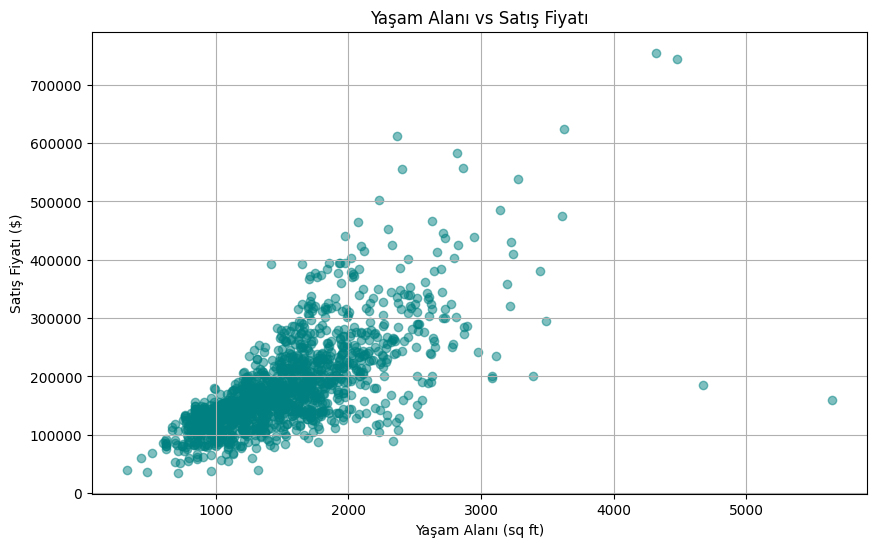

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.5, color='teal')
plt.title('Yaşam Alanı vs Satış Fiyatı')
plt.xlabel('Yaşam Alanı (sq ft)')
plt.ylabel('Satış Fiyatı ($)')
plt.grid(True) #Grafiğin ızgaralı olmasını sağlar
plt.show()

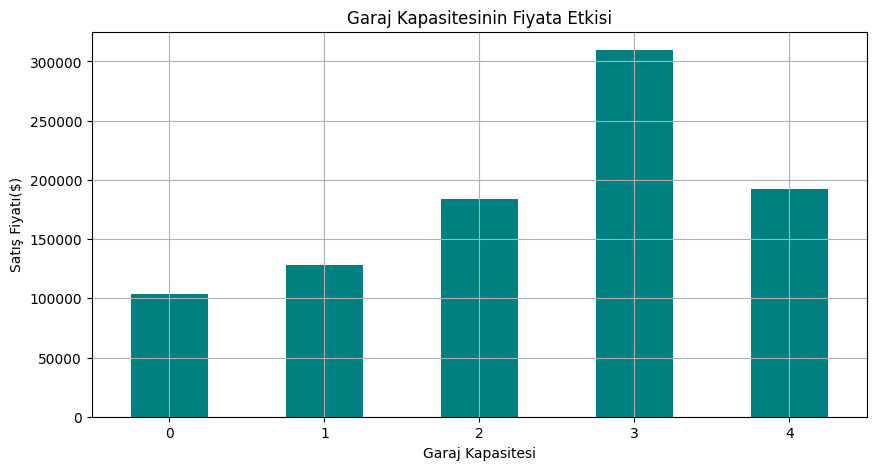

In [54]:
garage_capacity = df.groupby('GarageCars')['SalePrice'].mean()

plt.figure(figsize=(10,5))
garage_capacity.plot(kind='bar', color='teal')
plt.title('Garaj Kapasitesinin Fiyata Etkisi')
plt.xlabel('Garaj Kapasitesi')
plt.xticks(rotation=0)
plt.ylabel('Satış Fiyatı($)')
plt.grid(True)
plt.show()

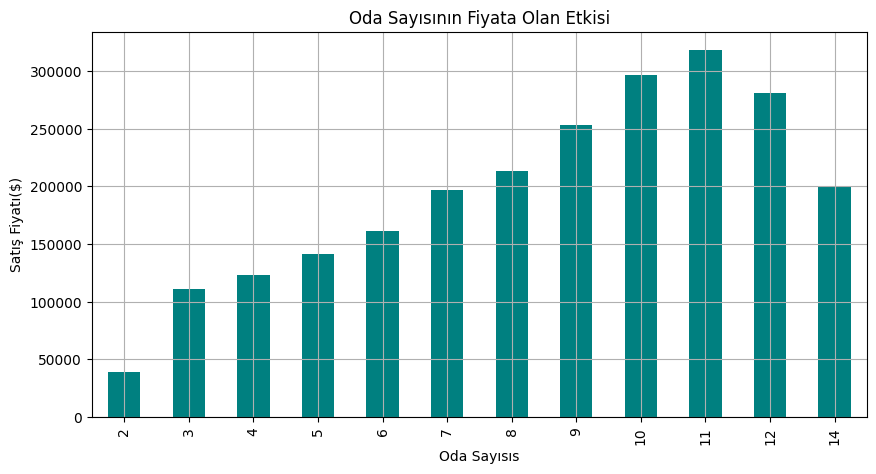

In [56]:
room_price = df.groupby('TotRmsAbvGrd')['SalePrice'].mean()
plt.figure(figsize=(10,5))
room_price.plot(kind='bar', color='teal')
plt.title('Oda Sayısının Fiyata Olan Etkisi')
plt.xlabel('Oda Sayısıs')
plt.ylabel('Satış Fiyatı($)')
plt.grid(True)
plt.show()